In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data_random_forest.csv')
data.head()

,Price,Year,Город,Коробка передач,Кузов,Привод,Пробег,Растаможен,Руль,Цвет,Names,Volume,Fuel_type
0,13800000,2018,Алматы,автомат,седан,передний привод,1.0,Да,слева,серебристый металлик,Toyota Camry,2.5,бензин
1,68000000,2014,Алматы,автомат,внедорожник,NaN,10300.0,Да,слева,черный,Mercedes-Benz G 63 AMG,5.5,бензин
2,5499999,2013,Алматы,автомат,седан,передний привод,39258.0,Да,слева,серый металлик,Toyota Corolla,1.6,бензин
3,1850000,1993,Шымкент,автомат,седан,задний привод,NaN,Да,слева,серый металлик,Mercedes-Benz E 220,2.2,газ-бензин
4,6100000,2013,Актобе,автомат,кроссовер,полный привод,60000.0,Да,слева,серый,Mitsubishi Outlander,2.4,бензин


In [3]:
y = data['Price']
data = data.drop(columns=['Names', 'Price'], axis=1)
data.head()

,Year,Город,Коробка передач,Кузов,Привод,Пробег,Растаможен,Руль,Цвет,Volume,Fuel_type
0,2018,Алматы,автомат,седан,передний привод,1.0,Да,слева,серебристый металлик,2.5,бензин
1,2014,Алматы,автомат,внедорожник,NaN,10300.0,Да,слева,черный,5.5,бензин
2,2013,Алматы,автомат,седан,передний привод,39258.0,Да,слева,серый металлик,1.6,бензин
3,1993,Шымкент,автомат,седан,задний привод,NaN,Да,слева,серый металлик,2.2,газ-бензин
4,2013,Актобе,автомат,кроссовер,полный привод,60000.0,Да,слева,серый,2.4,бензин


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 11 columns):
Year               4997 non-null int64
Город              4997 non-null object
Коробка передач    4997 non-null object
Кузов              4997 non-null object
Привод             4405 non-null object
Пробег             3276 non-null float64
Растаможен         4997 non-null object
Руль               4952 non-null object
Цвет               4596 non-null object
Volume             4995 non-null float64
Fuel_type          4995 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 429.5+ KB


In [5]:
np.unique(list(data['Привод']))

array(['nan', 'задний привод', 'передний привод', 'полный привод'],
      dtype='<U15')

In [6]:
data['Year'] = data['Year'].apply(str)
data['Пробег'] = data['Пробег'].fillna(data['Пробег'].median())
data['Volume'] = data['Volume'].fillna(data['Volume'].median())
data['Fuel_type'] = data['Fuel_type'].fillna(0)
data['Привод'] = data['Привод'].fillna('полный привод')
data['Руль'] = data['Руль'].fillna('слева')
data['Цвет'] = data['Цвет'].fillna('белый')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 11 columns):
Year               4997 non-null object
Город              4997 non-null object
Коробка передач    4997 non-null object
Кузов              4997 non-null object
Привод             4997 non-null object
Пробег             4997 non-null float64
Растаможен         4997 non-null object
Руль               4997 non-null object
Цвет               4997 non-null object
Volume             4997 non-null float64
Fuel_type          4997 non-null object
dtypes: float64(2), object(9)
memory usage: 429.5+ KB


data

In [7]:
year_list = np.unique(list(data['Year']))
year_list

array(['1953', '1961', '1964', '1966', '1969', '1977', '1979', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'], dtype='<U4')

In [8]:
counter = 1
for i in list(year_list):
    data['Year'].replace(i, counter, inplace=True)
    counter +=1

In [9]:
data.head()

,Year,Город,Коробка передач,Кузов,Привод,Пробег,Растаможен,Руль,Цвет,Volume,Fuel_type
0,45,Алматы,автомат,седан,передний привод,1.0,Да,слева,серебристый металлик,2.5,бензин
1,41,Алматы,автомат,внедорожник,полный привод,10300.0,Да,слева,черный,5.5,бензин
2,40,Алматы,автомат,седан,передний привод,39258.0,Да,слева,серый металлик,1.6,бензин
3,20,Шымкент,автомат,седан,задний привод,120000.0,Да,слева,серый металлик,2.2,газ-бензин
4,40,Актобе,автомат,кроссовер,полный привод,60000.0,Да,слева,серый,2.4,бензин


In [10]:
counter = 1
for i in np.unique(list(data['Город'])):
    data['Город'].replace(i, counter, inplace=True)
    counter +=1

In [11]:
counter = 1
for i in np.unique(list(data['Коробка передач'])):
    data['Коробка передач'].replace(i, counter, inplace=True)
    counter +=1

counter = 1
for i in np.unique(list(data['Кузов'])):
    data['Кузов'].replace(i, counter, inplace=True)
    counter +=1
    
counter = 1
for i in np.unique(list(data['Растаможен'])):
    data['Растаможен'].replace(i, counter, inplace=True)
    counter +=1

counter = 1
for i in np.unique(list(data['Привод'])):
    data['Привод'].replace(i, counter, inplace=True)
    counter +=1
    
counter = 1
for i in np.unique(list(data['Руль'])):
    data['Руль'].replace(i, counter, inplace=True)
    counter +=1

counter = 1
for i in np.unique(list(data['Цвет'])):
    data['Цвет'].replace(i, counter, inplace=True)
    counter +=1
    
counter = 1
for i in np.unique(list(data['Fuel_type'])):
    data['Fuel_type'].replace(i, counter, inplace=True)
    counter +=1

In [12]:
data.head()

,Year,Город,Коробка передач,Кузов,Привод,Пробег,Растаможен,Руль,Цвет,Volume,Fuel_type
0,45,11,1,11,2,1.0,1,1,28,2.5,2
1,41,11,1,1,3,10300.0,1,1,39,5.5,2
2,40,11,1,11,2,39258.0,1,1,30,1.6,2
3,20,135,1,11,1,120000.0,1,1,30,2.2,4
4,40,10,1,3,3,60000.0,1,1,29,2.4,2


modelling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = 42)

Decision Tree

In [15]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

In [17]:
print('MAE test: ', mean_absolute_error(y_pred, y_test))
print('MAE train: ', mean_absolute_error(tree.predict(X_train), y_train))

MAE test:  1499997.6922222222
MAE train:  26334.25475804658


In [18]:
print('R2 test: ', r2_score(y_pred, y_test))
print('R2 train: ', r2_score(tree.predict(X_train), y_train))

R2 test:  0.7177482588838329
R2 train:  0.9980765673660656


Adaboost

In [23]:
AdaBoostRegressor?

In [20]:
tree = DecisionTreeRegressor(max_depth=2)
boost = AdaBoostRegressor(base_estimator = tree)

In [21]:
boost.fit(X_train, y_train)
y_pred_test = boost.predict(X_test)
y_pred_train = boost.predict(X_train)

In [22]:
print('MAE test: ', mean_absolute_error(y_pred_test, y_test))
print('MAE train: ', mean_absolute_error(y_pred_train, y_train))

MAE test:  3901462.3121304894
MAE train:  3869931.033110573


Tuning hyperparameters with Grid search and cross val with boosting

In [25]:
params = {'n_estimators': np.arange(10,1001,10), 'learning_rate': np.arange(0.1, 2.1, 0.1), 'loss': ['linear', 'square', 'exponential']}

In [26]:
GridSearchCV?

In [27]:
tree = DecisionTreeRegressor(max_depth=2)
boost = AdaBoostRegressor(base_estimator = tree)

grid = GridSearchCV(estimator=boost, param_grid=params, cv = 5, 
                   n_jobs = -1, verbose=1)

In [28]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 10000 out of 10000

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([  10,   20, ...,  990, 1000]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [31]:
grid.best_params_

{'learning_rate': 0.2, 'n_estimators': 10}

In [32]:
y_pred_train_best = grid.best_estimator_.predict(X_train)
y_pred_test_best = grid.best_estimator_.predict(X_test)

In [33]:
print('MAE test with GSV: ', mean_absolute_error(y_pred_test_best, y_test))
print('MAE train with GSV: ', mean_absolute_error(y_pred_train_best, y_train))

MAE test with GSV:  2743987.1198835857
MAE train with GSV:  2829078.748196364


In [34]:
grid.best_score_

0.5686369174627277

Plotting

In [43]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [47]:
mae_test = []
mae_train = []

for i in np.arange(10,1001,10):
    tree = DecisionTreeRegressor(max_depth=2)
    boost = AdaBoostRegressor(base_estimator = tree, 
                              learning_rate = 0.2, 
                             loss = 'linear',
                             n_estimators = i)
    boost.fit(X_train, y_train)
    
    mae_train.append(np.mean(-cross_val_score(boost, 
                                             X_train, y_train, 
                                             cv = 5, 
                                             scoring='neg_mean_absolute_error',
                                             n_jobs = -1)))
    
    mae_test.append(np.mean(cross_val_predict(boost, 
                                        X_test, y_test, 
                                        cv = 5,
                                        n_jobs = -1)))

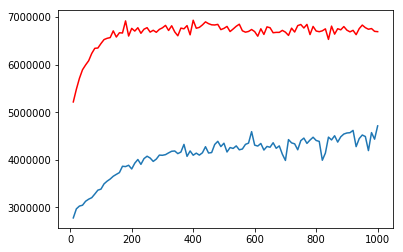

In [48]:
plt.plot(np.arange(10,1001,10), mae_train)
plt.plot(np.arange(10,1001,10), mae_test, c = 'red')
plt.show()

In [49]:
mae_test = []
mae_train = []

for i in np.arange(10,1001,10):
    tree = DecisionTreeRegressor(max_depth=1)
    boost = AdaBoostRegressor(base_estimator = tree, 
                              learning_rate = 0.2, 
                             loss = 'linear',
                             n_estimators = i)
    boost.fit(X_train, y_train)
    
    mae_train.append(np.mean(-cross_val_score(boost, 
                                             X_train, y_train, 
                                             cv = 5, 
                                             scoring='neg_mean_absolute_error',
                                             n_jobs = -1)))
    
    mae_test.append(np.mean(cross_val_predict(boost, 
                                        X_test, y_test, 
                                        cv = 5,
                                        n_jobs = -1)))

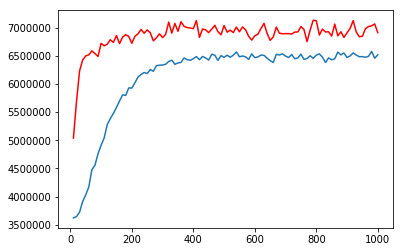

In [50]:
plt.plot(np.arange(10,1001,10), mae_train)
plt.plot(np.arange(10,1001,10), mae_test, c = 'red')
plt.show()

In [53]:
mae_test = []
mae_train = []

for i in np.arange(10,1001,10):
    tree = DecisionTreeRegressor(max_depth=3)
    boost = AdaBoostRegressor(base_estimator = tree, 
                              learning_rate = 0.2, 
                             loss = 'linear',
                             n_estimators = i)
    boost.fit(X_train, y_train)
    
    mae_train.append(np.mean(-cross_val_score(boost, 
                                             X_train, y_train, 
                                             cv = 5, 
                                             scoring='neg_mean_absolute_error',
                                             n_jobs = -1)))
    
    boost.fit(X_train, y_train)
    mae_test.append(np.mean(cross_val_predict(boost, 
                                        X_test, y_test, 
                                        cv = 5,
                                        n_jobs = -1)))

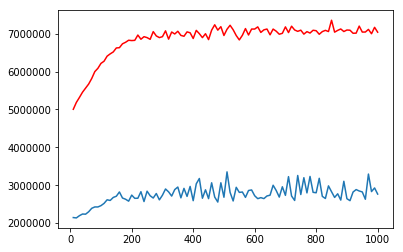

In [54]:
plt.plot(np.arange(10,1001,10), mae_train)
plt.plot(np.arange(10,1001,10), mae_test, c = 'red')
plt.show()